<a href="https://colab.research.google.com/github/sera0911/asia_ai_project/blob/main/3rd_mini_project/code/LGBMRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로드

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from lightgbm import LGBMRegressor, plot_importance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/projects/3차-따릉이/data/data.csv')
data

,자치구,시각,기온,풍속,강수량,미세먼지농도,이용건수,요일,달
0,0,0,-5.1,1.0,0.0,27.0,24,2,1
1,0,1,-5.0,0.8,0.0,20.0,29,2,1
2,0,2,-4.8,1.3,0.0,21.0,28,2,1
3,0,3,-4.9,0.7,0.0,31.0,21,2,1
4,0,4,-4.7,1.4,0.0,30.0,14,2,1
...,...,...,...,...,...,...,...,...,...
216253,11,19,-5.4,1.7,0.0,44.0,33,3,12
216254,11,20,-6.5,1.5,0.0,35.0,30,3,12
216255,11,21,-6.2,1.4,0.0,42.0,24,3,12
216256,11,22,-5.6,1.6,0.0,42.0,7,3,12


# 테스트

In [ ]:
# feature와 target 분리
features = data.drop(['이용건수'], axis=1)
target = data['이용건수']

In [ ]:
# MinMaxScaler()를 사용해 스캐일링
scaler = MinMaxScaler()
feature_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [ ]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(feature_scaled, target, random_state=0)

In [ ]:
# 과적합을 방지하기 위해 KFold 사용
kfold = KFold(n_splits=5, shuffle=True)

In [ ]:
# LightGBM Regressor 사용
lgbmr = LGBMRegressor()

# 파라미터들 dict 형태로 정의
param = {
    'max_depth': [10, 20, -1], # 트리의 최대 깊이  / 과적합 제어
    'learning_rate': [0.1, 0.05], # 학습률
    'num_leaves': [64,128, 196], # 각 트리가 가질 수 있는 최대 리프의 개수 / 정확도 및 복잡률과 비례
    'n_estimators': [2000, 3000], # 반복 수행하는 트리의 개수
    }

# RandomizedSearchCV를 사용해 하이퍼 파라미터 최적화
rand_lgbmr = RandomizedSearchCV(lgbmr, # 사용 모델
                                scoring='r2', # 학습에 사용할 손실 함수
                                n_iter=50, # 파라미터별 학습 수
                                param_distributions=param, # 파라미터
                                cv=kfold, # 폴드 값에 KFold 객체 할당
                                return_train_score=True, # 학습 결과 리턴
                                verbose=2)

# GridSearch 하면서 모든 파라미터값들에 대해 학습 수행
rand_lgbmr.fit(X_train, y_train)

# 각 파라미터값들에 대한 모델 결과값들이 cv_results_ 객체에 할당됨
scores_df = pd.DataFrame(rand_lgbmr.cv_results_)

# score 결과값(ndarray형태로 할당됨) 중 특정 칼럼들만 가져옴 
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

C:\SPB_DATA\.conda\envs\mlearn\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END learning_rate=0.1, max_depth=10, n_estimators=2000, num_leaves=64; total time=   5.0s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=2000, num_leaves=64; total time=   4.9s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=2000, num_leaves=64; total time=   5.8s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=2000, num_leaves=64; total time=   4.6s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=2000, num_leaves=64; total time=   4.8s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=2000, num_leaves=128; total time=   7.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=2000, num_leaves=128; total time=   7.2s
[CV] END learning_rate=0.1

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'num_leaves': 64, 'n_estimators': 2000, 'max_...",0.942079,32,0.939645,0.942568,0.943411
1,"{'num_leaves': 128, 'n_estimators': 2000, 'max...",0.944113,24,0.941279,0.943690,0.946033
2,"{'num_leaves': 196, 'n_estimators': 2000, 'max...",0.943933,26,0.940666,0.943913,0.945501
3,"{'num_leaves': 64, 'n_estimators': 3000, 'max_...",0.943789,29,0.941362,0.943753,0.945473
4,"{'num_leaves': 128, 'n_estimators': 3000, 'max...",0.944571,21,0.941911,0.944017,0.946493
5,"{'num_leaves': 196, 'n_estimators': 3000, 'max...",0.943800,28,0.940575,0.943688,0.945462
6,"{'num_leaves': 64, 'n_estimators': 2000, 'max_...",0.944807,19,0.942150,0.944750,0.946478
7,"{'num_leaves': 128, 'n_estimators': 2000, 'max...",0.947118,9,0.943649,0.947815,0.949329
8,"{'num_leaves': 196, 'n_estimators': 2000, 'max...",0.947040,10,0.943779,0.946708,0.948593
9,"{'num_leaves': 64, 'n_estimators': 3000, 'max_...",0.946194,17,0.943678,0.946005,0.948000


# 결과 확인

In [ ]:
# 최적 파라미터는 best_params_에 저장되어있음
print(f"최적 파라미터 : {rand_lgbmr.best_params_}")
print(f"최적 모델의 r2 score: {rand_lgbmr.best_score_}")

print()
print()

# 최적의 파라미터로 학습되어 있는 모델 할당
estimator = rand_lgbmr.best_estimator_

# 최적의 모델로 예측해보고 실제값과 정확도 비교
y_pred = estimator.predict(X_test)
print(f"test 데이터를 사용한 r2 score : {r2_score(y_test, y_pred)}")
print(f"test 데이터를 사용한 mean_absolute_error : {mean_absolute_error(y_test, y_pred)}")

최적의 파라미터 : {'num_leaves': 196, 'n_estimators': 3000, 'max_depth': -1, 'learning_rate': 0.05}
최적의 파라미터로 모델의 r2 : 0.948135652101777


실제값과 예측값 r2 score : 0.9494308473266436
실제값과 예측값 mean_absolute_error : 15.00767699678916


In [ ]:
# 예측 결과 데이터프래임으로 확인
result = pd.DataFrame(np.transpose([y_test.values, y_pred]), columns=['true', 'pred'])

In [ ]:
result['error'] = abs(((result['true'] - result['pred']) / result['true'])*100)
result

,true,pred,error
0,157.0,145.192135,7.520933
1,166.0,156.089219,5.970350
2,19.0,12.233872,35.611201
3,52.0,69.998557,34.612609
4,22.0,20.909853,4.955216
...,...,...,...
54060,18.0,15.801717,12.212686
54061,248.0,242.732803,2.123870
54062,27.0,29.407384,8.916239
54063,39.0,39.257691,0.660745


In [ ]:
#폰트 깨질 때 해결
import matplotlib.font_manager as fm

path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

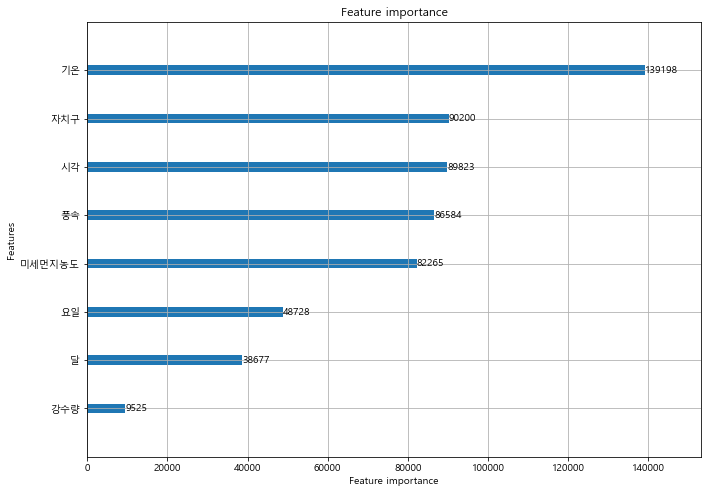

In [ ]:
# feature 중요도 확인
fig, ax = plt.subplots(figsize=(11,8))
plot_importance(estimator, ax)